# Traversals

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from graphs_for_slides import *
def adj(g):
        for v, adj in g.adjacency():
            print(f'{v: >2d}', ':', *adj.keys())

In [2]:
def T1():
    g = nx.cycle_graph(12)
    g.add_nodes_from([12,13,14])
    g.add_edges_from([(1, 11), (1, 12), (11, 12), (7, 9), (3, 5), (3, 13), (9, 14), (14, 7), (5, 13)])
    g.add_edges_from([(10, 12), (12, 2), (2, 13), (13, 6), (6, 14), (14, 10)])
    pos = nx.shell_layout(g, nlist=[range(12, 15), range(12)], rotate=0)
    return g, pos

 0 : 1 11
 1 : 0 2 11 12
 2 : 1 3 12 13
 3 : 2 4 5 13
 4 : 3 5
 5 : 4 6 3 13
 6 : 5 7 13 14
 7 : 6 8 9 14
 8 : 7 9
 9 : 8 10 7 14
10 : 9 11 12 14
11 : 10 0 1 12
12 : 1 11 10 2
13 : 3 5 2 6
14 : 9 7 6 10


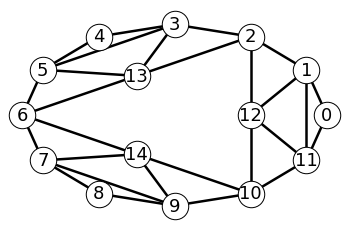

In [3]:
g1, pos1=T1()
adj(g1)
plt.axes().set_ymargin(0.1)
nx.draw(g1, pos1, **(COLORS|BB))

## Depth First Search

In [4]:
for v,w in nx.dfs_edges(g1, 14):
    print(f'({v}, {w})', end='; ')

(14, 9); (9, 8); (8, 7); (7, 6); (6, 5); (5, 4); (4, 3); (3, 2); (2, 1); (1, 0); (0, 11); (11, 10); (10, 12); (2, 13); 

In [5]:
for v,w in nx.dfs_edges(g1):
    print(f'({v}, {w})', end='; ')

(0, 1); (1, 2); (2, 3); (3, 4); (4, 5); (5, 6); (6, 7); (7, 8); (8, 9); (9, 10); (10, 11); (11, 12); (10, 14); (6, 13); 

In [6]:
def T9():
    g = nx.disjoint_union(nx.complete_graph(5), nx.complete_graph(5))
    pos=circle_n(5)
    pos=pos |{k+5:v+(2.5, 0.0) for k,v in pos.items()}
    return g, pos

 0 : 1 2 3 4
 1 : 0 2 3 4
 2 : 0 1 3 4
 3 : 0 1 2 4
 4 : 0 1 2 3
 5 : 6 7 8 9
 6 : 5 7 8 9
 7 : 5 6 8 9
 8 : 5 6 7 9
 9 : 5 6 7 8


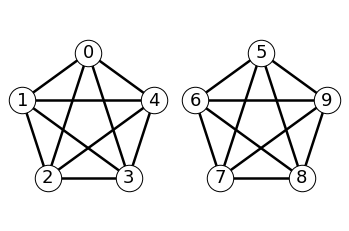

In [7]:
g2, pos2=T9()
adj(g2)
ax=plt.axes()
ax.set_aspect('equal',adjustable='datalim')
nx.draw(g2, pos2, **(COLORS|BB))


In [8]:
for v,w in nx.dfs_edges(g2, 9):
    print(f'({v}, {w})', end='; ')

(9, 5); (5, 6); (6, 7); (7, 8); 

In [9]:
for v,w in nx.dfs_edges(g2):
    print(f'({v}, {w})', end='; ')

(0, 1); (1, 2); (2, 3); (3, 4); (5, 6); (6, 7); (7, 8); (8, 9); 

## Breadth First Search

In [10]:
for v,w in nx.bfs_edges(g2, 9):
    print(f'({v}, {w})', end='; ')

(9, 5); (9, 6); (9, 7); (9, 8); 

### вершина, з якої прийшли в дану вершину (безпосередній предок)

In [11]:
for v,w in nx.bfs_predecessors(g2, 9):
    print(f'({v}, {w})', end='; ')

(5, 9); (6, 9); (7, 9); (8, 9); 

### вершини, в які пішли з даної вершини (безпосередні нащадки)

In [12]:
for v,w in nx.bfs_successors(g2, 9):
    print(f'({v}, {w})', end='; ')

(9, [5, 6, 7, 8]); 

## Упорядкування вершин, що отримується в результаті обходу в глибину

### вершини упорядковуються за часом початку розгляду

In [13]:
for v in nx.dfs_preorder_nodes(g2):
    print(v, end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

### вершини упорядковуються за часом завершення розгляду

In [14]:
for v in nx.dfs_postorder_nodes(g2):
    print(v, end=', ')

4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 